In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [3]:
from sklearn import preprocessing
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from src.analysis.analysis import analyze_data_quality,  main_analysis

#### Loading the dataset

In [5]:

data = pd.read_csv('../data/processed/data.csv')
data = data[data["dataset"]=="train"]

RAPPORT D'ANALYSE DE LA QUALITÉ DES DONNÉES

1. ANALYSE DES VALEURS MANQUANTES
----------------------------------------

Colonnes avec valeurs manquantes:
tif_path: 8 valeurs manquantes (0.10%)
ndvi: 17 valeurs manquantes (0.22%)
evi: 8 valeurs manquantes (0.10%)
ndwi: 17 valeurs manquantes (0.22%)
gndvi: 17 valeurs manquantes (0.22%)
savi: 8 valeurs manquantes (0.10%)
msavi: 8 valeurs manquantes (0.10%)

2. ANALYSE DES DOUBLONS
----------------------------------------
Nombre total de lignes dupliquées: 0

3. ANALYSE DES VALEURS ABERRANTES
----------------------------------------

Valeurs aberrantes détectées:

FarmID:
  - Nombre de valeurs aberrantes: 644
  - Pourcentage: 8.16%
  - Plage des valeurs aberrantes: [278.00, 1297443.00]

CHeight:
  - Nombre de valeurs aberrantes: 773
  - Pourcentage: 9.80%
  - Plage des valeurs aberrantes: [170.00, 250.00]

ndvi:
  - Nombre de valeurs aberrantes: 1316
  - Pourcentage: 16.68%
  - Plage des valeurs aberrantes: [0.47, 18.34]

evi:
  - Nombre 

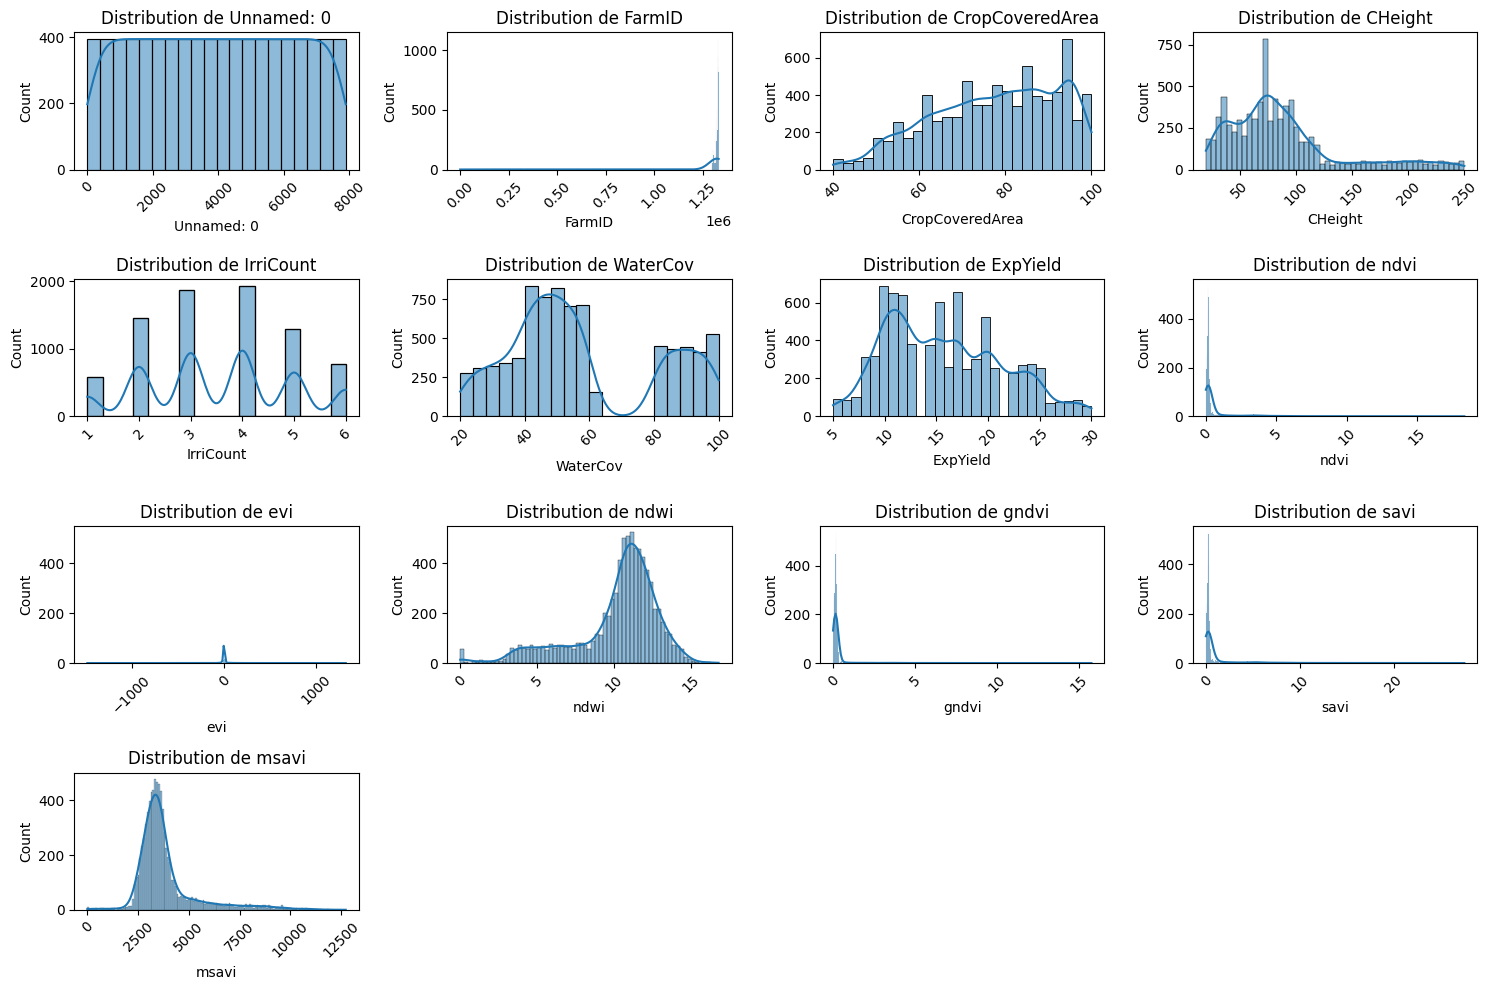

In [6]:
quality_report = analyze_data_quality(data)

/tmp/ipykernel_162416/1132500991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='category', palette='viridis')


Text(0, 0.5, 'Nombre de occurrences')

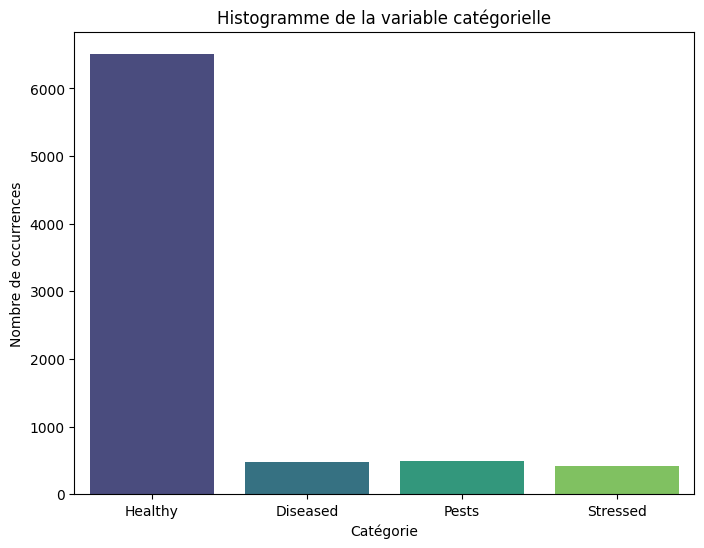

In [7]:

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='category', palette='viridis')
plt.title('Histogramme de la variable catégorielle')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de occurrences')

### Analyze crop data by performing statistical tests and creating visualizations.
This code conducts Mann-Whitney U tests for numerical variables and
chi-square tests for categorical variables to assess their relationship
with crop health. It also generates box plots for numerical variables
and a correlation matrix heatmap.


Variables numériques significativement associées à la catégorie (p < 0.05):
- CropCoveredArea: p-value = 0.0000
- WaterCov: p-value = 0.0142

Variables catégorielles significativement associées à la catégorie (p < 0.05):
- Crop: p-value = 0.0001
- District: p-value = 0.0000
- IrriType: p-value = 0.0007
- IrriSource: p-value = 0.0006
- Season: p-value = 0.0026


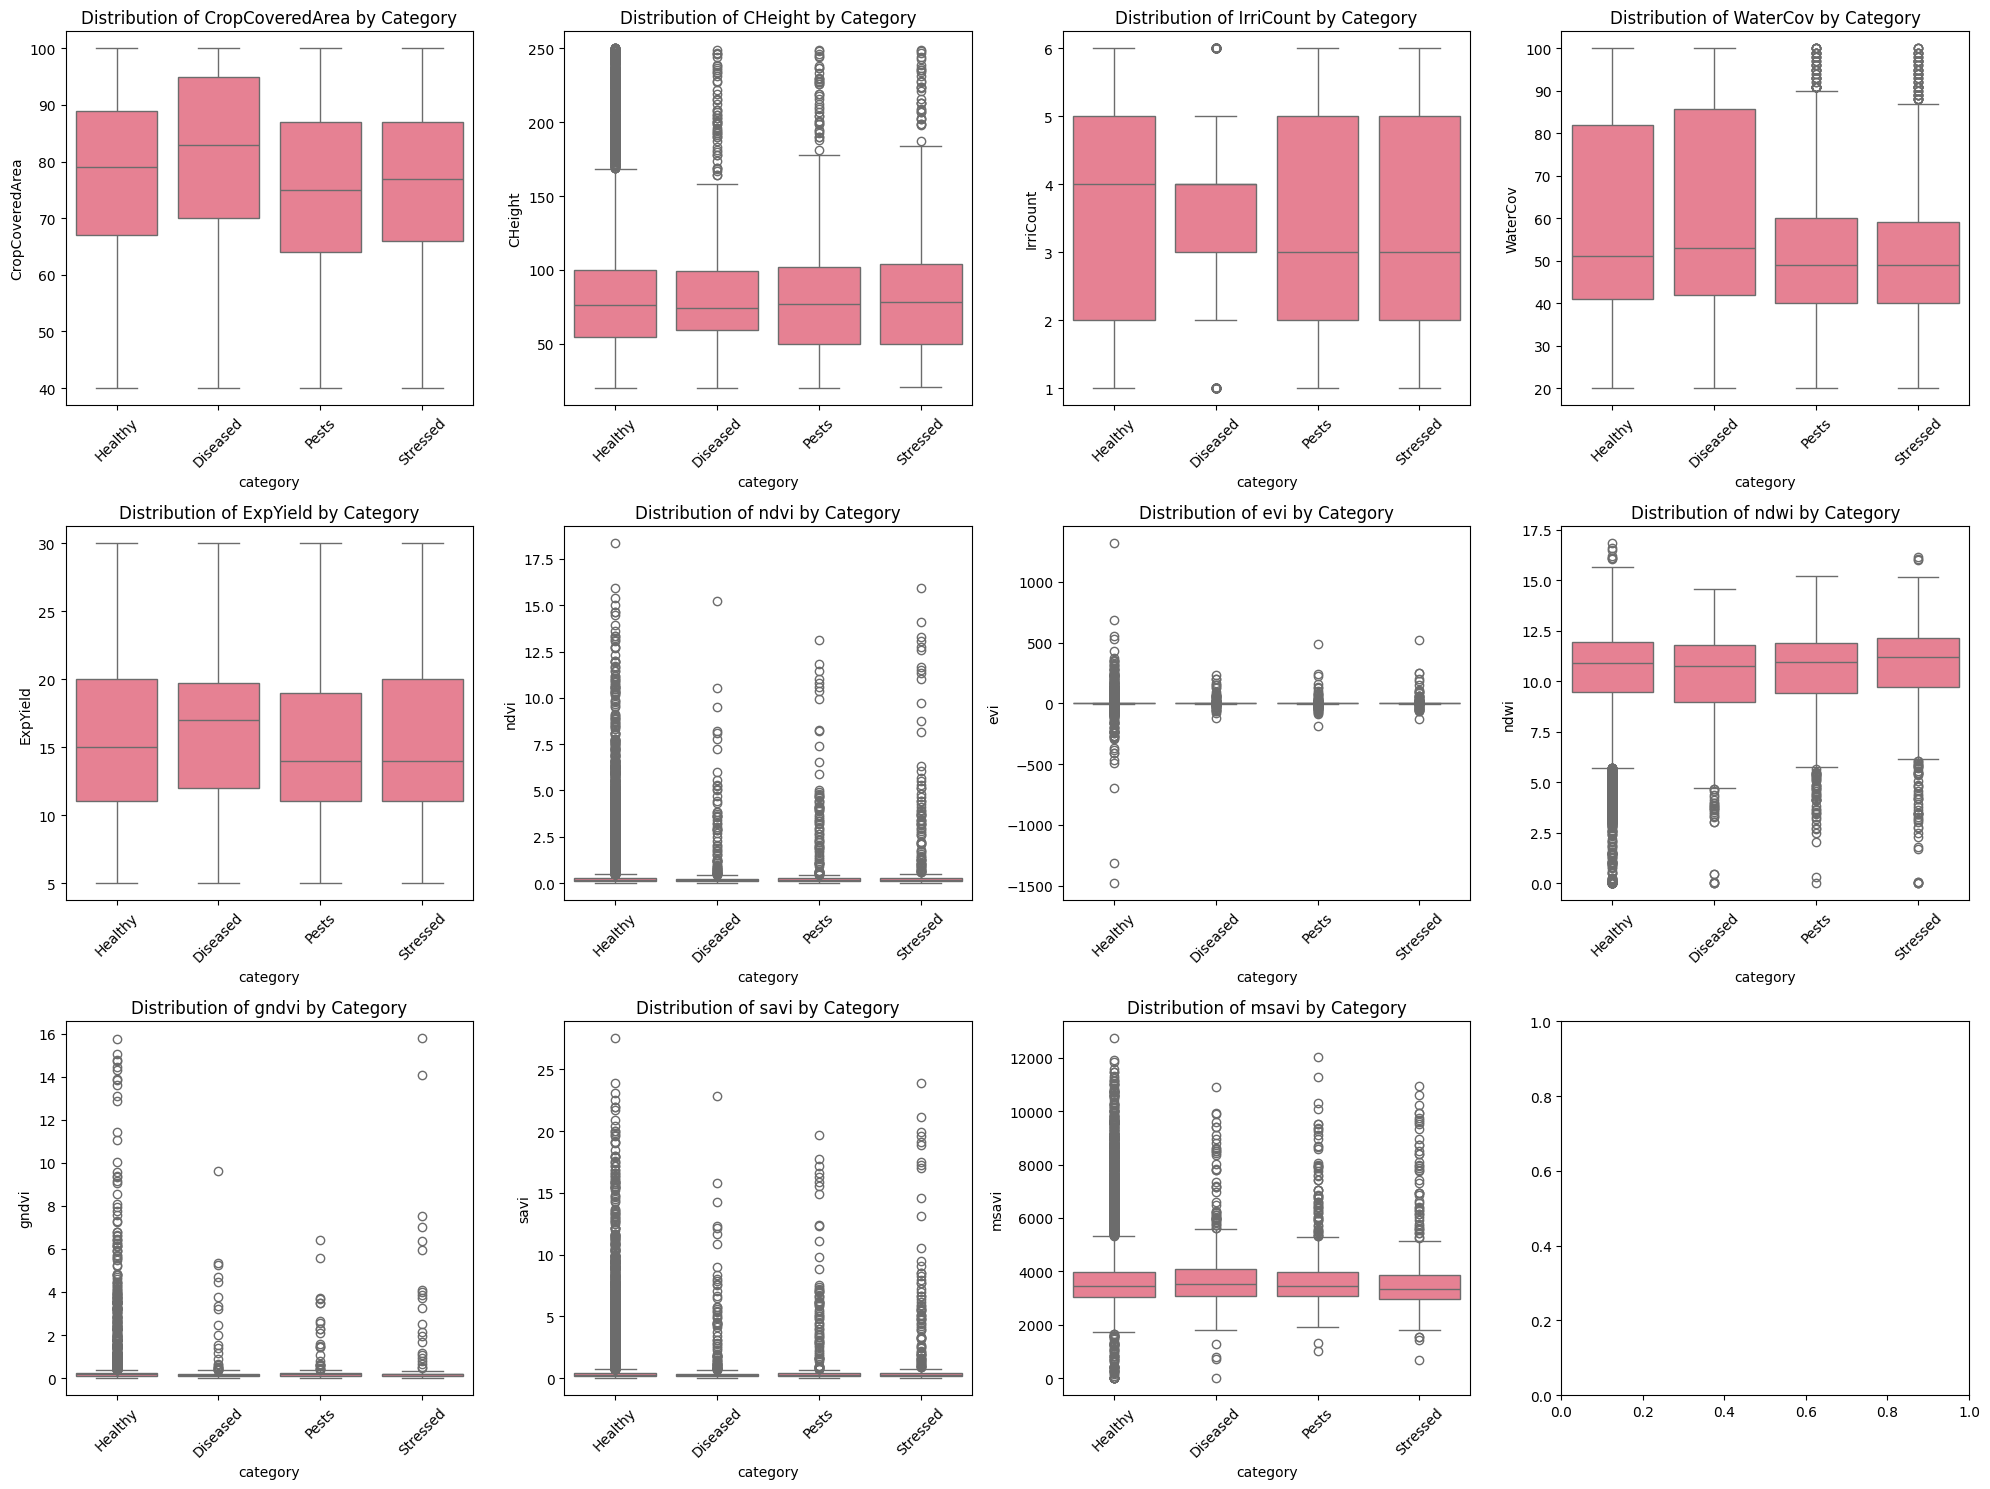

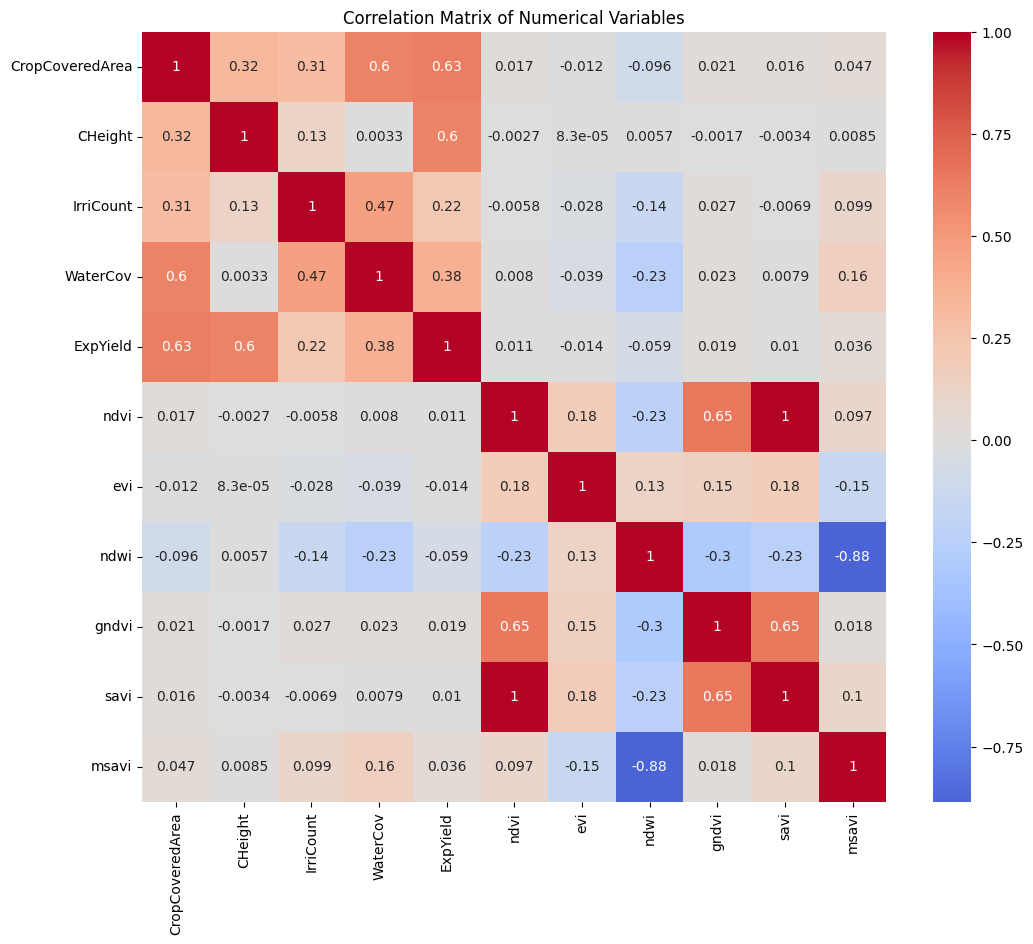

In [6]:
analysis_results = main_analysis(data)

### Analyse des résultats
On observe une forte correlation entre les variables savi et ndvi ce qui indique l'utilisation des deux variables dans notre modèle est une source de rédondance, 

